In [1]:
__author__ = 'Anastasia Tsvetkova'
__email__  = 'tsvetkova.lea@gmail.com'

import yaml, h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from avalanche import LC, Restored_LC

### Let's generate several light curves

In [2]:
lc = LC(tau_min=0.0009, res=0.001, n_cut=200)
%timeit lc.generate_avalanche()

78.6 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


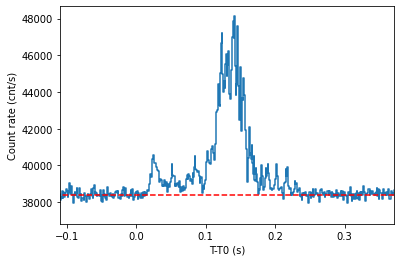

In [6]:
lc = LC(tau_min=0.0009, res=0.001, n_cut=200)
par = lc.generate_avalanche()
lc.plot_lc()

In [2]:
# lc = LC(tau_min=0.0009, res=0.001, n_cut=200)
lc = LC()
lc.hdf5_lc_generation(outfile="./test.h5", overwrite=True, seed=12345)

In [6]:
lc = LC()
lc.hdf5_lc_generation(n_lcs=1, outfile="./example.h5", overwrite=True, start_seed=12345)

In [55]:
filename = "./example.h5"

with h5py.File(filename, "r") as hf:
    hf = h5py.File(filename, 'r')
    data = np.array(hf.get('GRB_PARAMETERS/GRB_0')[:])
    hf['GRB_PARAMETERS/GRB_0'].attrs.keys()
    n_pulses = hf['GRB_PARAMETERS/GRB_0'].attrs['N_PULSES']
    peak_flux = hf['GRB_PARAMETERS/GRB_0'].attrs['PEAK_VALUE']
    
data.shape

(30, 4)

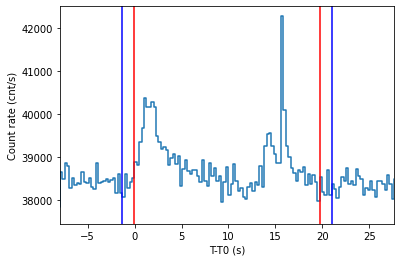

In [13]:
lc = LC()
par = lc.generate_avalanche()
lc.plot_lc(save=False, show_duration=True)

Time resolution:  0.256
Generating a new pulse with tau=2.232
Generating a new pulse with tau=0.870
Generating a new pulse with tau=0.396
Generating a new pulse with tau=0.165


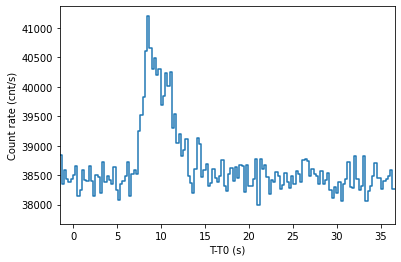

In [16]:
lc = LC(verbose=True)
par = lc.generate_avalanche()
lc.plot_lc()

### Let's open a yaml-file with avalanches and plot the T90 distribution for the sample

In [18]:
with open("./avalanche_parameters.yml", 'r') as f:
        loaded_data = yaml.safe_load(f)

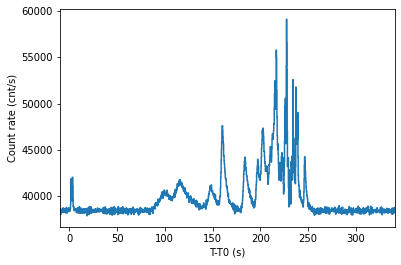

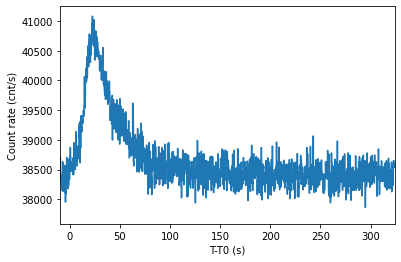

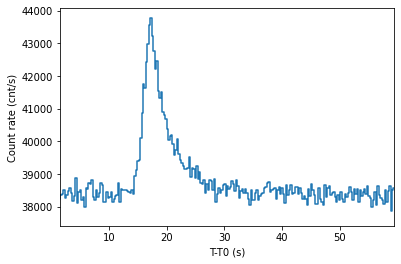

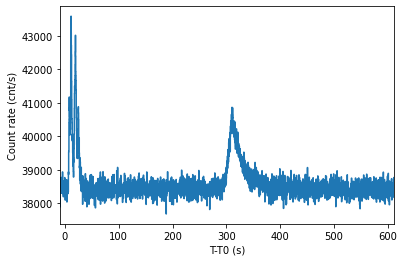

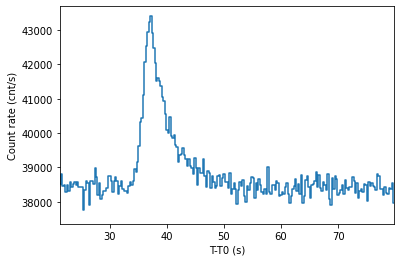

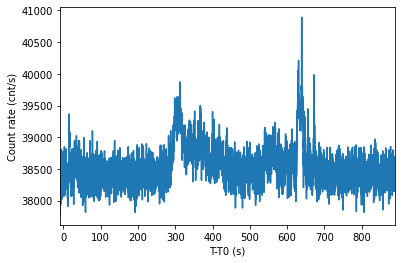

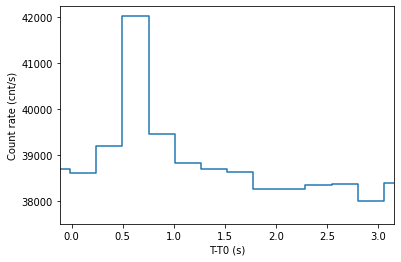

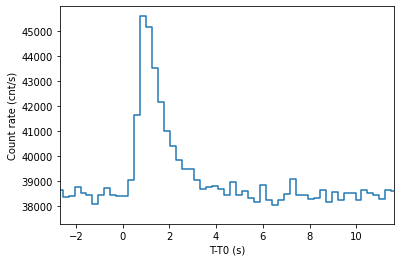

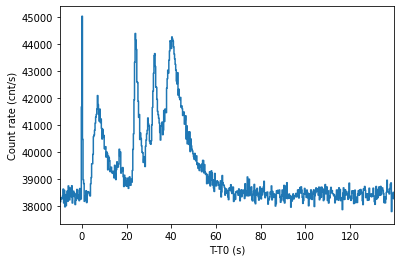

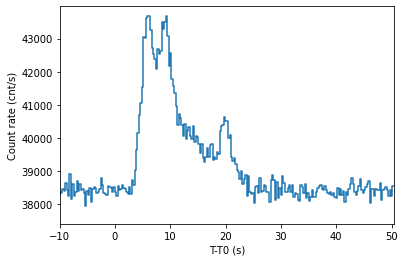

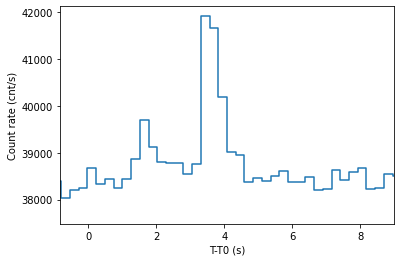

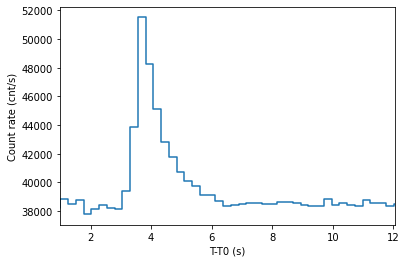

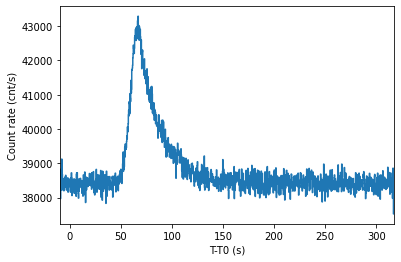

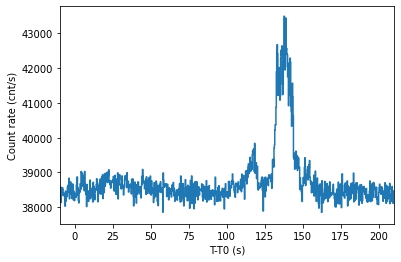

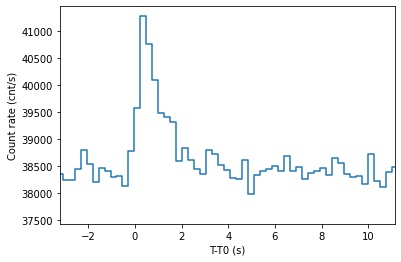

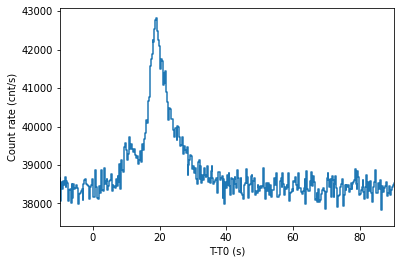

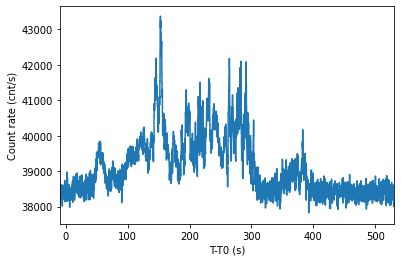

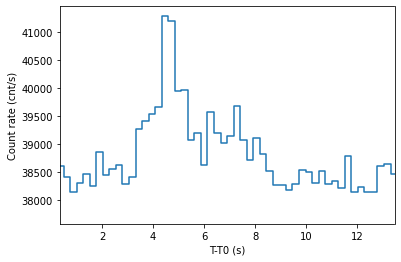

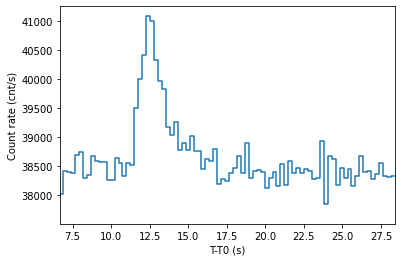

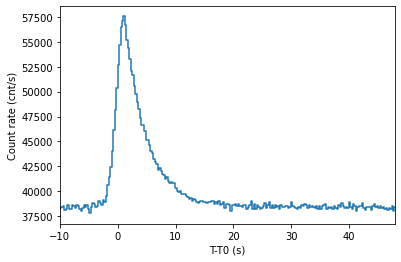

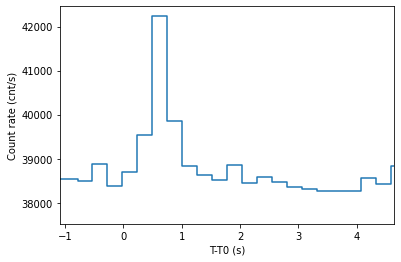

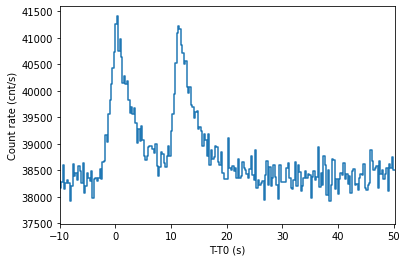

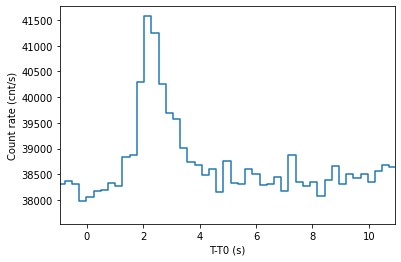

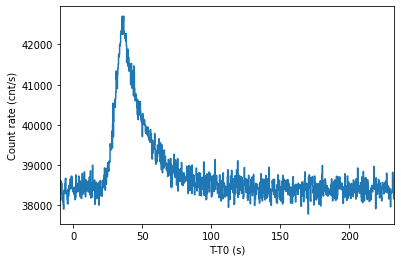

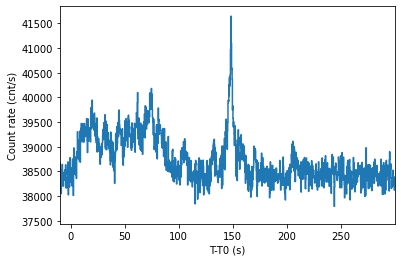

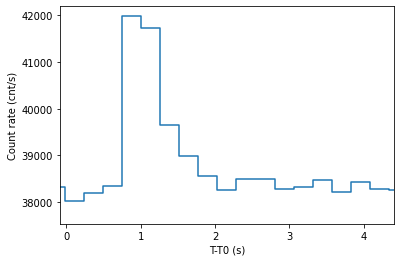

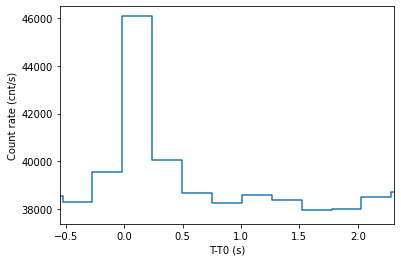

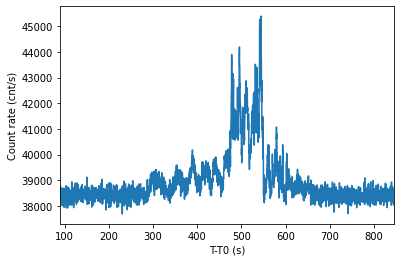

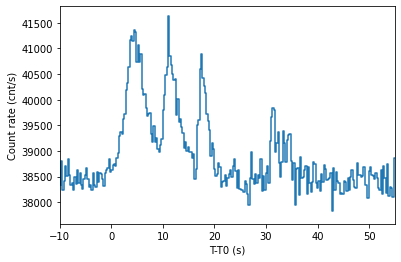

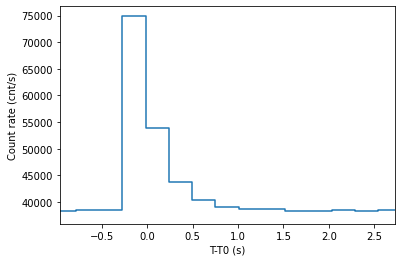

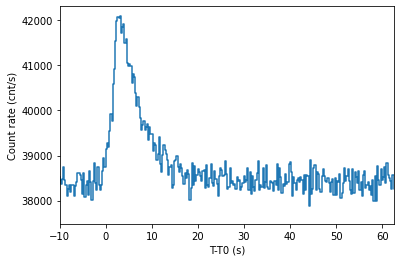

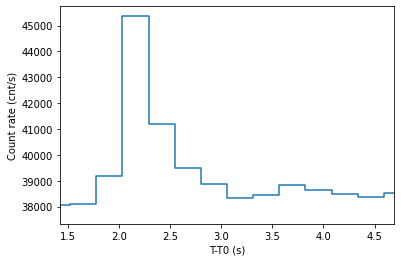

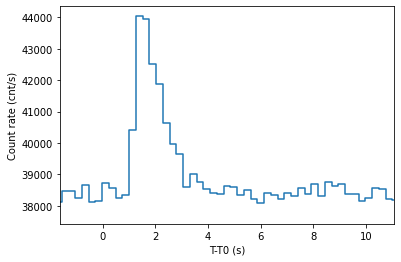

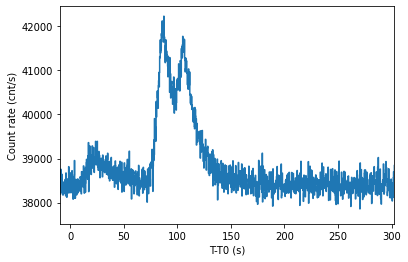

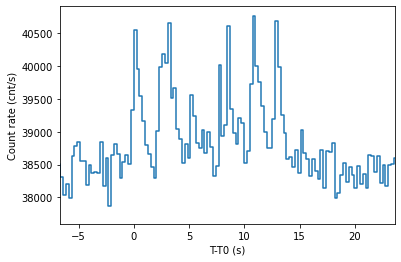

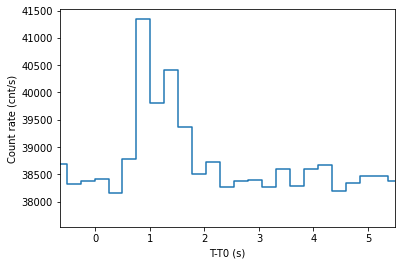

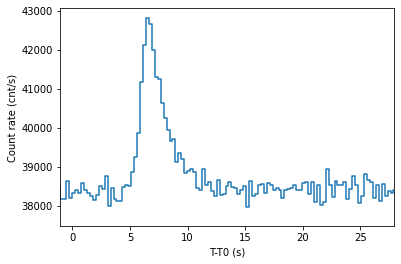

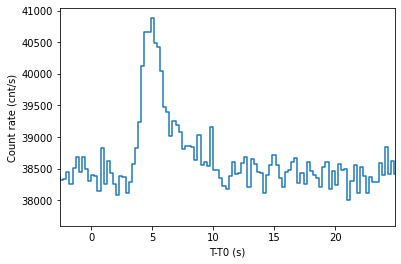

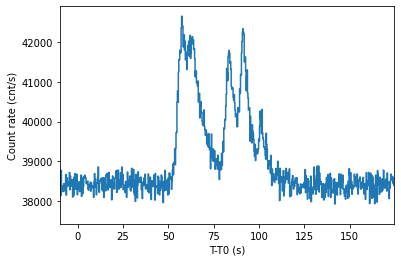

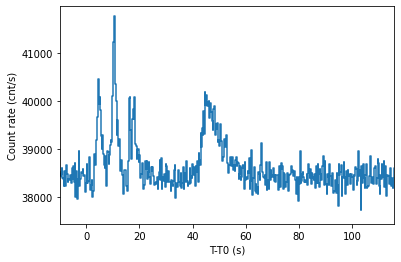

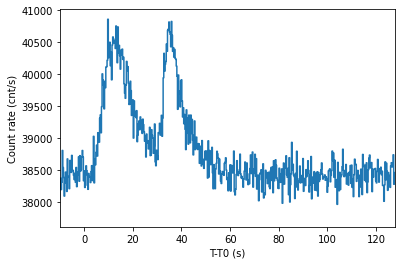

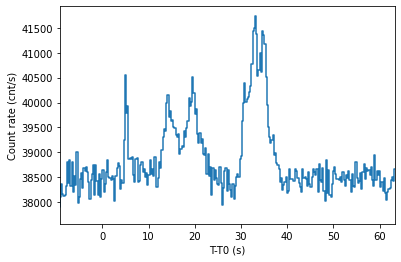

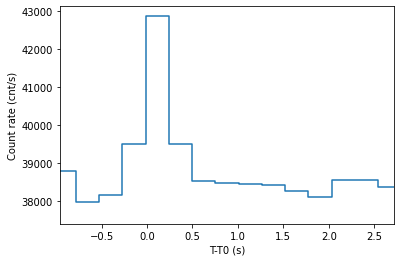

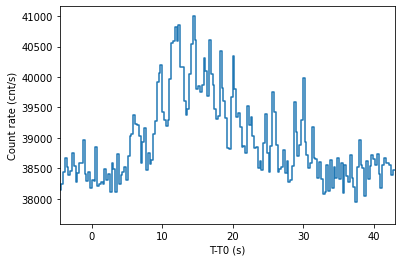

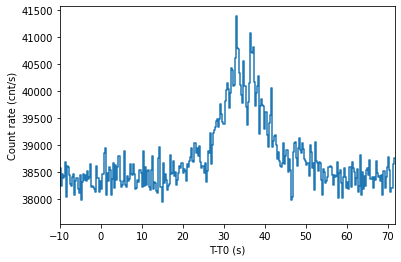

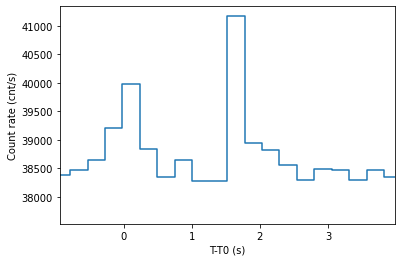

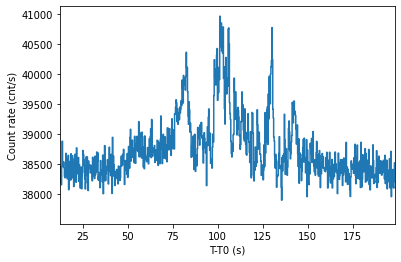

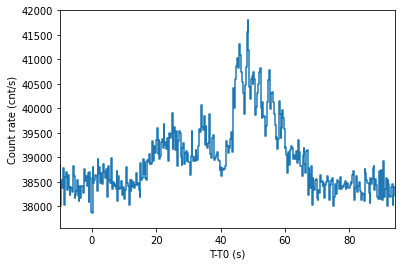

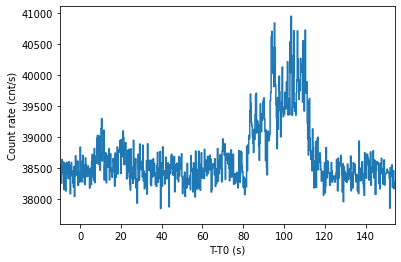

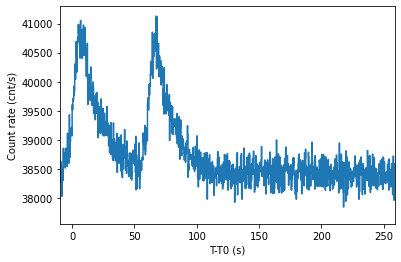

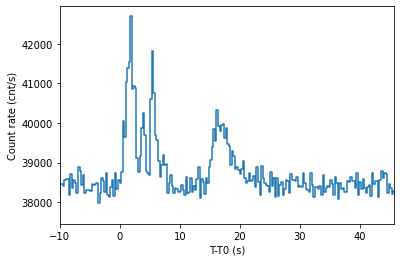

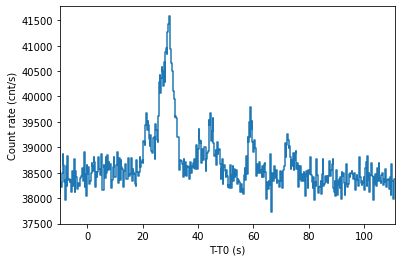

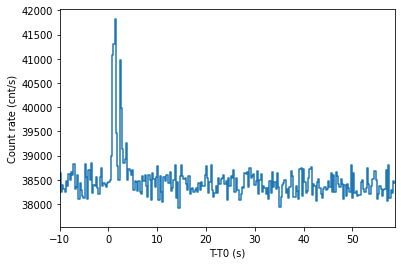

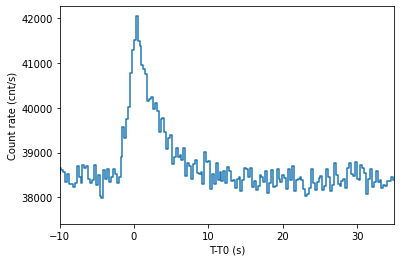

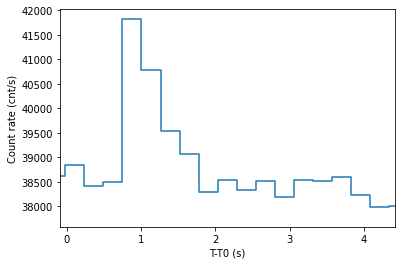

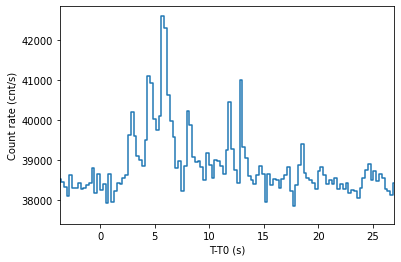

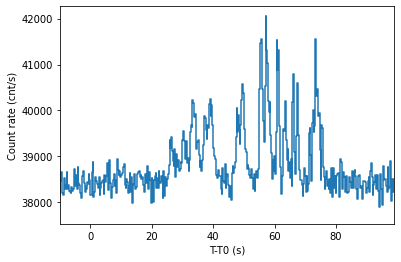

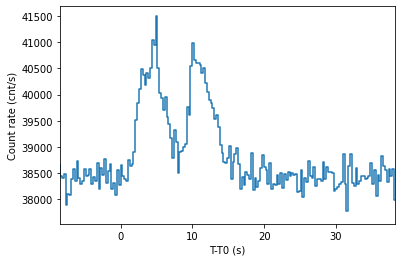

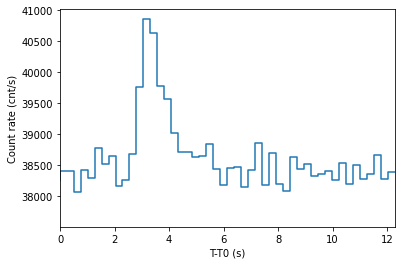

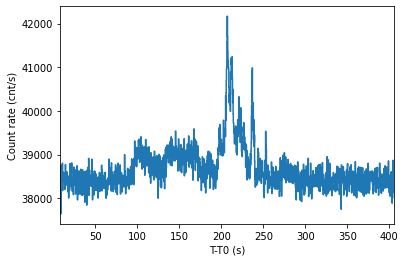

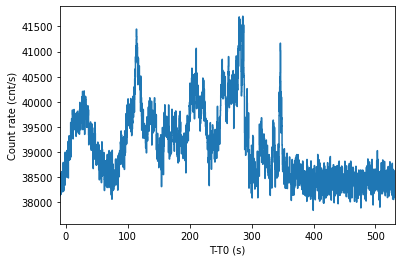

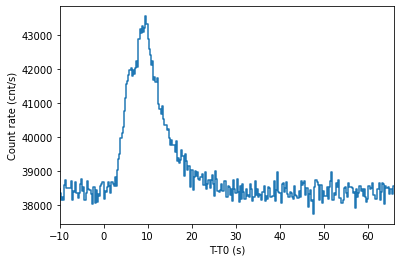

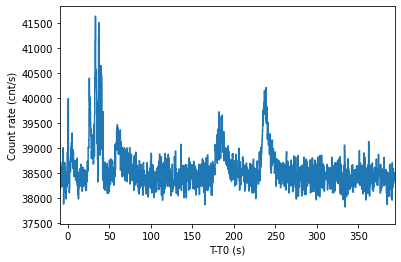

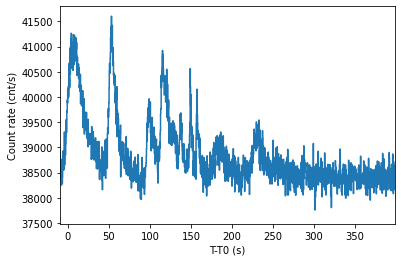

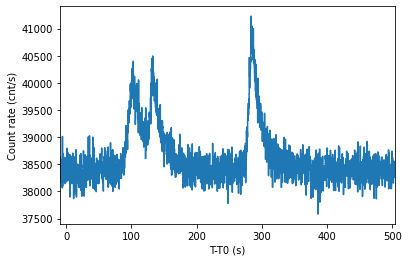

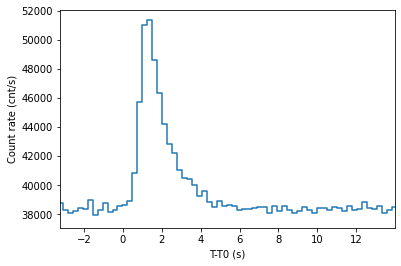

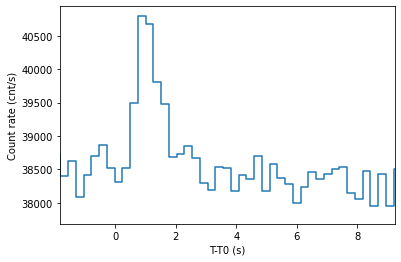

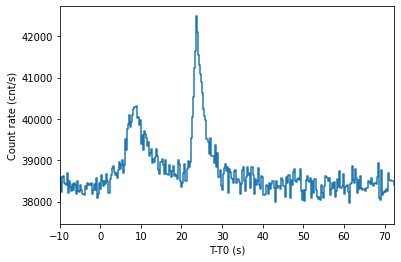

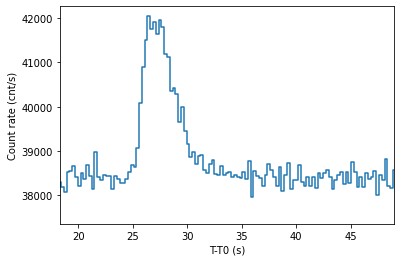

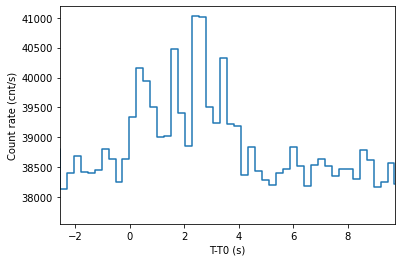

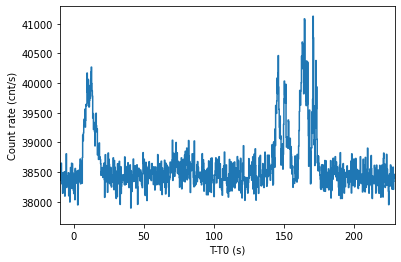

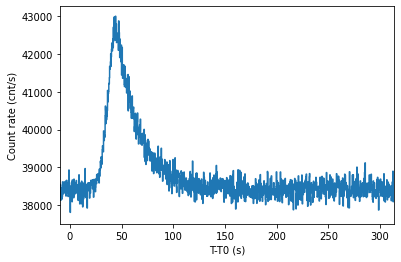

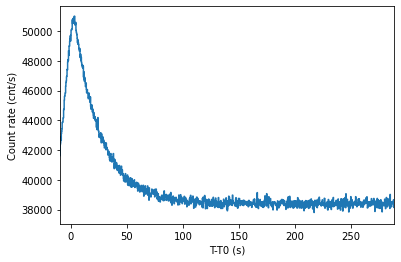

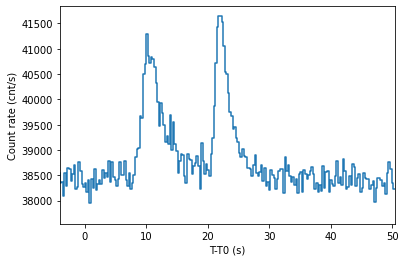

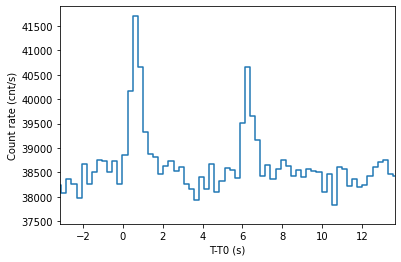

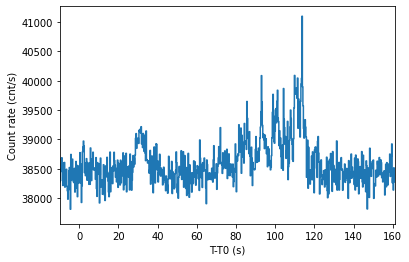

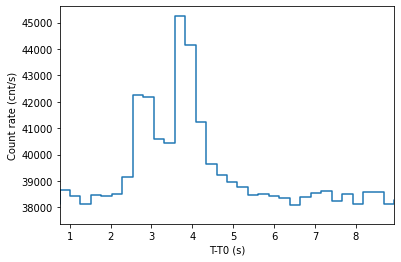

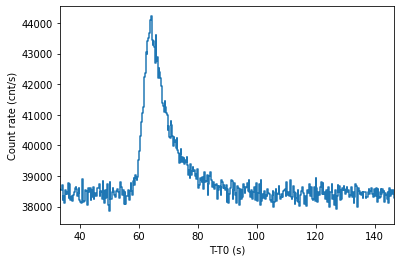

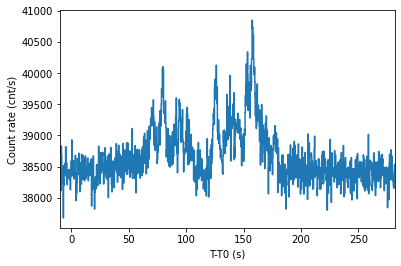

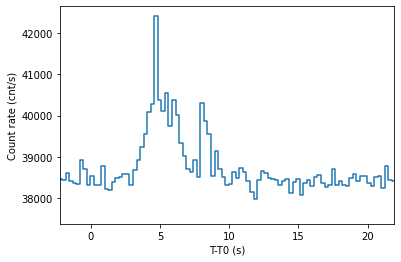

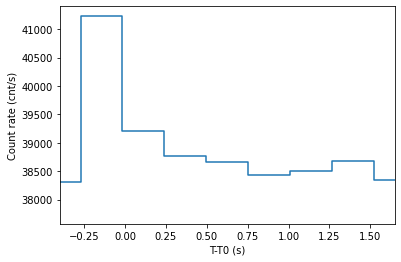

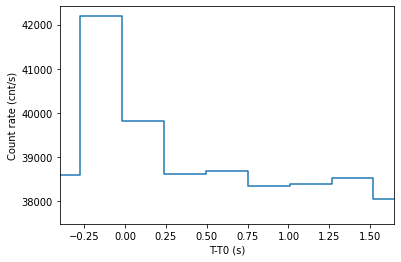

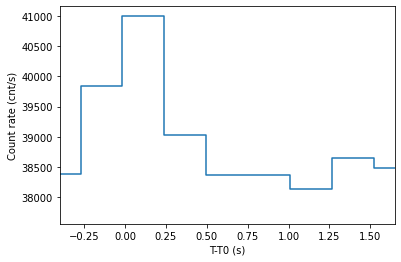

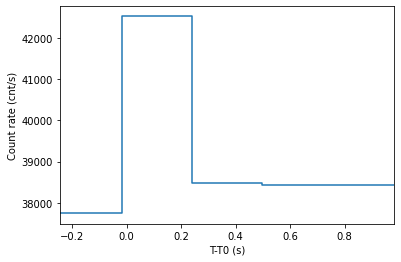

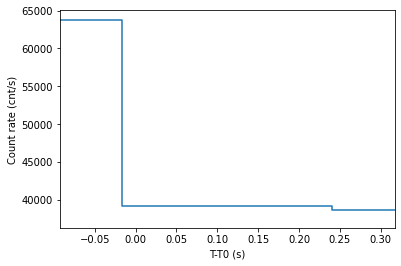

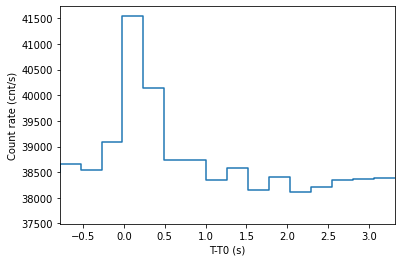

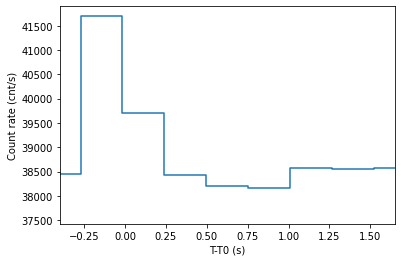

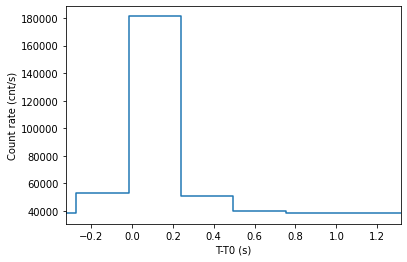

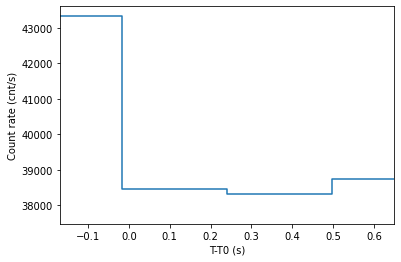

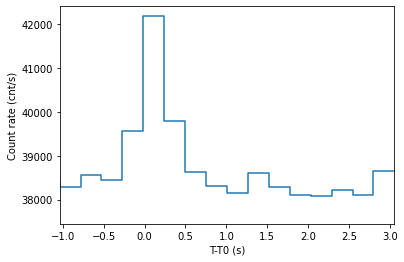

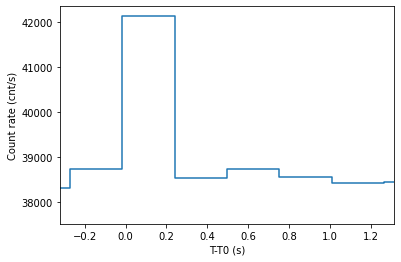

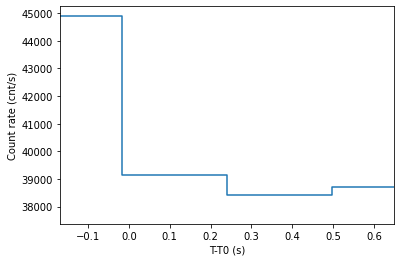

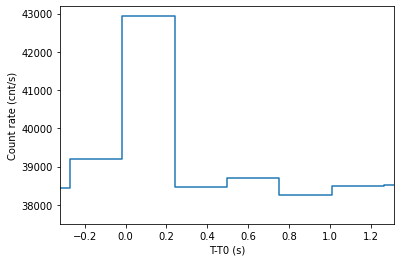

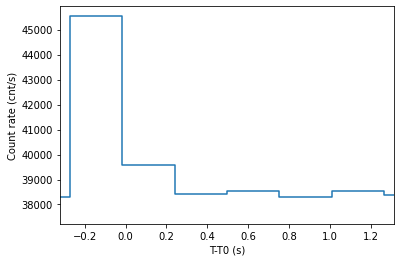

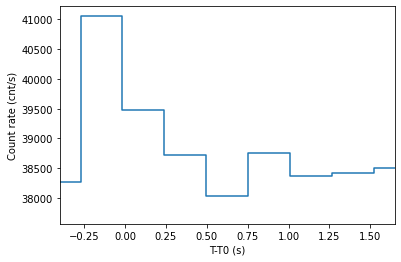

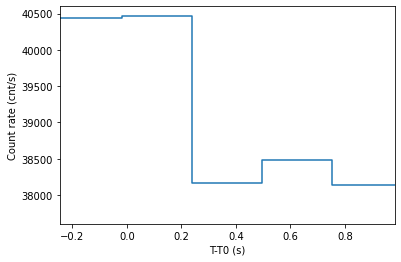

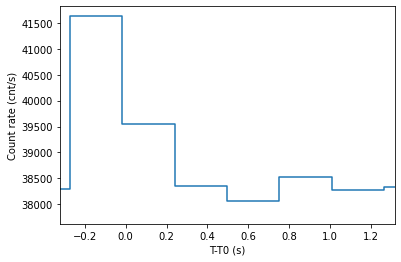

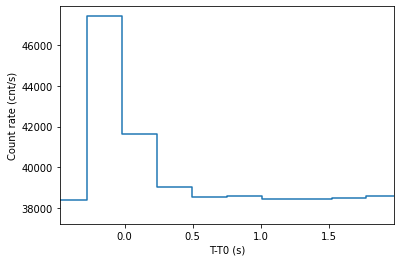

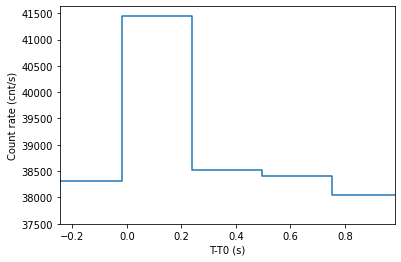

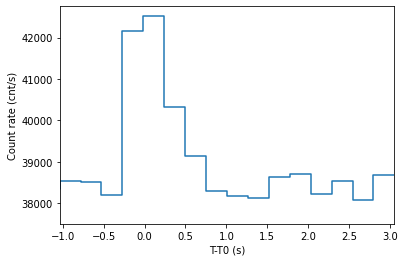

In [19]:
T90 = list()

for name in loaded_data:
    par_list = list(name.values())[0]
    lc = Restored_LC(par_list)
    lc.plot_lc()
    T90.append(float(lc.T90[0]))
    

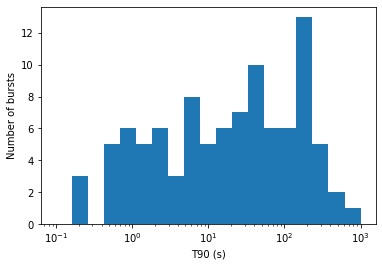

In [20]:
plt.hist(T90, bins=np.geomspace(0.1,1000,20))
plt.xlabel("T90 (s)")
plt.ylabel("Number of bursts")
plt.xscale('log')
plt.show()